In [1]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import random
import math
from math import floor
from random import sample
from tqdm import tqdm
import requests
import json

In [2]:
## Fetching Customer's data from database
data = requests.get('http://20.198.81.29:5000/admin/customer/1')

data = data.json()
data

{'customer': {'id': 1,
  'name': 'Ajinkya Taranekar',
  'gender': 'MALE',
  'phoneNumber': '8518076044',
  'annualIncome': 100000.0,
  'aadhar': '871836501211',
  'pan': 'BSMPT6753Q',
  'electricityBill': 1996.0,
  'residenceAddress': {'firstLine': '66, Scheme No 114',
   'secondLine': 'Indore',
   'city': 'Indore',
   'state': 'Madhya Pradesh',
   'pincode': None,
   'longitude': 75.8981,
   'latitude': 22.7681},
  'aadharCardFrontImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-aad4b.appspot.com/o/IkQosGbzQrXVc8fQzorhvQZjIBX2%2FAadhar%2Ffdc82b09-000b-4ce5-bf8c-f001db88b1841506725469182819881.jpg?alt=media&token=80798974-35a0-4aae-94e8-600b4015720e',
  'aadharCardBackImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-aad4b.appspot.com/o/IkQosGbzQrXVc8fQzorhvQZjIBX2%2FAadhar%2F58e59726-faad-487a-8b64-240eb24979ab1749815431958091906.jpg?alt=media&token=5ff7f7c5-e9f1-4f9a-b6e7-764c1e008ba6',
  'panCardImageUrl': 'https://firebasestorage.googleapis.com/v0/b/mitra-a

In [3]:
customerData = {
    "customer_id" : data["customer"]["id"],
    'customer_income': data["customer"]['annualIncome'],
    'customer_electricity_bill': data["customer"]['electricityBill'],
    'residence_latitude': data["customer"]['residenceAddress']['latitude'],
    'residence_longitude': data["customer"]['residenceAddress']['longitude'],
    'customer_cibil': data['customer']['cibilScore'],
    'customer_status': data['customer']['status'],
    'customer_verified': data['customer']['verified'],
    'gurantor_income': data['instantLoanSurrogates']['guarantor']['annualIncome'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_electricity_bill': data['instantLoanSurrogates']['guarantor']['electricityBill'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_worthy': data['instantLoanSurrogates']['guarantor']['worthy'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_cibil': data['instantLoanSurrogates']['guarantor']['cibilScore'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_residence_latitude': data['instantLoanSurrogates']["guarantor"]['residenceAddress']['latitude'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'gurantor_residence_longitude': data['instantLoanSurrogates']["guarantor"]['residenceAddress']['longitude'] if data['instantLoanSurrogates']['guarantor'] else 0,
    'location_category': data['instantLoanSurrogates']['locationCategory'],
    'competition': data['instantLoanSurrogates']['competition'],
    'taxReturns': sum(i['tax'] for i in data['instantLoanSurrogates']['taxReturns']),
    'credit': sum(i['creditAmount'] for i in data['instantLoanSurrogates']['creditAmountOfShopCustomers']) if data['instantLoanSurrogates']['creditAmountOfShopCustomers'] else 0,
    'bank_account': sum(i['currentValue'] if i['currentValue'] else 0 for i in data["allBankAccounts"]),
    'shop_latitude': data["shop"]['shopAddress']['latitude'],
    'shop_longitude': data["shop"]['shopAddress']['longitude'],
    'shop_area': data["shop"]['area'],
    'shop_rating': data["shop"]['rating'],
    'shop_electricity_bill': data["shop"]['electricityAmount'],
    'shop_ownership': data["shop"]['ownership'],
    'shop_warehouse_number': data["shop"]['wareHouse']['numberOfWareHouses'],
    'shop_warehouse_area': sum(data["shop"]['wareHouse']['areaOfWareHouses']) / data["shop"]['wareHouse']['numberOfWareHouses'],
    'items': sum(product['quantity'] * product['pricePerUnit'] for product in data["shop"]['wareHouse']['itemsSet']),
    'loan_amount': data['allLoans'][-1]['demandedAmount'],
}

customerData

{'customer_id': 1,
 'customer_income': 100000.0,
 'customer_electricity_bill': 1996.0,
 'residence_latitude': 22.7681,
 'residence_longitude': 75.8981,
 'customer_cibil': None,
 'customer_status': 7,
 'customer_verified': None,
 'gurantor_income': 150.0,
 'gurantor_electricity_bill': 4500.0,
 'gurantor_worthy': None,
 'gurantor_cibil': None,
 'gurantor_residence_latitude': 22.7422,
 'gurantor_residence_longitude': 75.8947,
 'location_category': None,
 'competition': None,
 'taxReturns': 0.0,
 'credit': 0,
 'bank_account': 0,
 'shop_latitude': 22.7606,
 'shop_longitude': 75.8912,
 'shop_area': 500.0,
 'shop_rating': None,
 'shop_electricity_bill': 1996.0,
 'shop_ownership': 'PURCHASED',
 'shop_warehouse_number': 1,
 'shop_warehouse_area': 500.0,
 'items': 735750.0,
 'loan_amount': 50000.0}

In [4]:
list(customerData.keys())

['customer_id',
 'customer_income',
 'customer_electricity_bill',
 'residence_latitude',
 'residence_longitude',
 'customer_cibil',
 'customer_status',
 'customer_verified',
 'gurantor_income',
 'gurantor_electricity_bill',
 'gurantor_worthy',
 'gurantor_cibil',
 'gurantor_residence_latitude',
 'gurantor_residence_longitude',
 'location_category',
 'competition',
 'taxReturns',
 'credit',
 'bank_account',
 'shop_latitude',
 'shop_longitude',
 'shop_area',
 'shop_rating',
 'shop_electricity_bill',
 'shop_ownership',
 'shop_warehouse_number',
 'shop_warehouse_area',
 'items',
 'loan_amount']

In [5]:
list(customerData.values())

[1,
 100000.0,
 1996.0,
 22.7681,
 75.8981,
 None,
 7,
 None,
 150.0,
 4500.0,
 None,
 None,
 22.7422,
 75.8947,
 None,
 None,
 0.0,
 0,
 0,
 22.7606,
 75.8912,
 500.0,
 None,
 1996.0,
 'PURCHASED',
 1,
 500.0,
 735750.0,
 50000.0]

In [27]:
customerData['customer_verified']="Not Verified"
customerData['shop_rating']=0
customerData['loan_status']="Charged Off"
customerDf = pd.DataFrame([customerData.values()], columns=customerData.keys())
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_longitude,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status
0,1,100000.00,1996.00,22.77,75.90,None,7,Not Verified,150.00,4500.00,...,75.89,500.00,0,1996.00,PURCHASED,1,500.00,735750.00,50000.00,Charged Off


In [7]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [29]:
for i in tqdm(range(1,1000)):
    customerDf.at[i,'customer_id'] = i+1
    customerDf.at[i,'customer_income'] = loan_data.at[i,'annual_inc']
    customerDf.at[i,'gurantor_income'] = loan_data.at[i,'annual_inc']*round(random.uniform(0, 2),4)
    customerDf.at[i,'shop_ownership'] = loan_data.at[i,'home_ownership']
    customerDf.at[i,'customer_verified'] = loan_data.at[i,'verification_status']
    customerDf.at[i,'bank_account'] = loan_data.at[i,'total_acc']*10000
    customerDf.at[i,'loan_status'] = loan_data.at[i,'loan_status']
    
    customerDf.at[i,'loan_amount'] = loan_data.at[i,'loan_amnt']*2.5
    customerDf.at[i,'sanctioned_loan_amount'] = loan_data.at[i,'loan_amnt']*round(random.uniform(0.5, 1.5),4)*2.5
#     customerDf.at[i,'term'] = loan_data.at[i,'term'].replace('months', '')
#     customerDf.at[i,'rate'] = loan_data.at[i,'int_rate']
#     customerDf.at[i,'installment'] = loan_data.at[i,'installment']
    
    customerDf.at[i,'residence_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'residence_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    customerDf.at[i,'shop_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'shop_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    customerDf.at[i,'gurantor_residence_latitude'] = round(random.uniform(22.614544, 22.799159),8)
    customerDf.at[i,'gurantor_residence_longitude'] = round(random.uniform(75.792446, 75.941390),8)
    
    customerDf.at[i,'customer_cibil'] = 0
    customerDf.at[i,'gurantor_cibil'] = 0
    customerDf.at[i,'customer_status'] = 7
    
    customerDf.at[i,'shop_rating'] = int(random.uniform(0, 5))
    customerDf.at[i,'location_category'] = int(random.uniform(0, 2))
    
    customerDf.at[i,'shop_warehouse_number'] = int(random.uniform(0, 4))
    customerDf.at[i,'shop_area'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'shop_warehouse_area'] = round(random.uniform(200, 1000),2)
    
    customerDf.at[i,'customer_electricity_bill'] = round(random.uniform(200, 2000),2)
    customerDf.at[i,'gurantor_electricity_bill'] = round(random.uniform(200, 2000),2)
    customerDf.at[i,'shop_electricity_bill'] = round(random.uniform(200, 1000),2)
    
    customerDf.at[i,'items'] = round(random.uniform(100000, 1000000),2)
    customerDf.at[i,'credit'] = round(random.uniform(200, 1000),2)
    customerDf.at[i,'taxReturns'] = round(random.uniform(0, 10000),2)
    customerDf.at[i,'gurantor_worthy'] = int(random.uniform(0, 1))
    
customerDf.head()

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 2389.96it/s]


,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status,sanctioned_loan_amount
0,1.00,100000.00,1996.00,22.77,75.90,None,7.00,Not Verified,150.00,4500.00,...,500.00,0.00,1996.00,PURCHASED,1.00,500.00,735750.00,50000.00,Charged Off,nan
1,2.00,65000.00,1126.03,22.72,75.80,0,7.00,Not Verified,107373.50,1947.84,...,512.55,3.00,720.52,MORTGAGE,3.00,696.04,307844.92,20000.00,Fully Paid,27766.00
2,3.00,43057.00,1226.68,22.77,75.86,0,7.00,Source Verified,33046.25,663.74,...,927.90,2.00,203.85,RENT,2.00,276.83,421423.22,39000.00,Fully Paid,49225.80
3,4.00,54000.00,1379.83,22.78,75.93,0,7.00,Not Verified,29797.20,921.32,...,621.45,0.00,281.09,RENT,1.00,526.52,657771.06,18000.00,Fully Paid,13782.60
4,5.00,55000.00,439.32,22.80,75.91,0,7.00,Verified,96343.50,1491.06,...,404.52,0.00,982.65,MORTGAGE,0.00,326.85,643369.00,60937.50,Charged Off,44173.59


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customerDf['customer_verified'] = labelencoder.fit_transform(customerDf['customer_verified'])
customerDf['shop_ownership'] = labelencoder.fit_transform(customerDf['shop_ownership'])
customerDf['loan_status'] = labelencoder.fit_transform(customerDf['loan_status'])

customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status,sanctioned_loan_amount
0,1.00,100000.00,1996.00,22.77,75.90,None,7.00,0,150.00,4500.00,...,500.00,0.00,1996.00,2,1.00,500.00,735750.00,50000.00,0,nan
1,2.00,65000.00,1126.03,22.72,75.80,0,7.00,0,107373.50,1947.84,...,512.55,3.00,720.52,0,3.00,696.04,307844.92,20000.00,1,27766.00
2,3.00,43057.00,1226.68,22.77,75.86,0,7.00,1,33046.25,663.74,...,927.90,2.00,203.85,3,2.00,276.83,421423.22,39000.00,1,49225.80
3,4.00,54000.00,1379.83,22.78,75.93,0,7.00,0,29797.20,921.32,...,621.45,0.00,281.09,3,1.00,526.52,657771.06,18000.00,1,13782.60
4,5.00,55000.00,439.32,22.80,75.91,0,7.00,2,96343.50,1491.06,...,404.52,0.00,982.65,0,0.00,326.85,643369.00,60937.50,0,44173.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.00,40000.00,672.97,22.79,75.85,0,7.00,1,28008.00,958.63,...,984.34,3.00,875.23,0,2.00,772.61,622734.49,25000.00,0,35172.50
996,997.00,96000.00,1764.08,22.78,75.89,0,7.00,0,134755.20,1681.51,...,711.69,1.00,919.08,3,3.00,661.99,584514.70,22500.00,1,16688.25
997,998.00,65000.00,1552.47,22.64,75.84,0,7.00,0,77499.50,805.90,...,442.49,4.00,829.18,0,3.00,790.58,127932.49,14000.00,1,11953.20
998,999.00,79980.00,1828.44,22.63,75.87,0,7.00,1,23770.06,971.41,...,592.81,3.00,804.10,3,3.00,980.33,539450.16,62500.00,1,71631.25


In [11]:
customerDf['sanctioned_loan_amount'].describe()

count      999.000000
mean     22017.260563
std      14722.024225
min       1201.500000
25%      11389.687500
50%      18401.850000
75%      29021.197500
max      78361.500000
Name: sanctioned_loan_amount, dtype: float64

In [12]:
customerDf['loan_amount'].describe()

count     1000.00000
mean     21805.88750
std      12352.37028
min       1500.00000
25%      12571.87500
50%      18750.00000
75%      30000.00000
max      52500.00000
Name: loan_amount, dtype: float64

In [31]:
customerDf = customerDf.fillna(0)
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status,sanctioned_loan_amount
0,1.00,100000.00,1996.00,22.77,75.90,0,7.00,0,150.00,4500.00,...,500.00,0.00,1996.00,2,1.00,500.00,735750.00,50000.00,0,0.00
1,2.00,65000.00,1126.03,22.72,75.80,0,7.00,0,107373.50,1947.84,...,512.55,3.00,720.52,0,3.00,696.04,307844.92,20000.00,1,27766.00
2,3.00,43057.00,1226.68,22.77,75.86,0,7.00,1,33046.25,663.74,...,927.90,2.00,203.85,3,2.00,276.83,421423.22,39000.00,1,49225.80
3,4.00,54000.00,1379.83,22.78,75.93,0,7.00,0,29797.20,921.32,...,621.45,0.00,281.09,3,1.00,526.52,657771.06,18000.00,1,13782.60
4,5.00,55000.00,439.32,22.80,75.91,0,7.00,2,96343.50,1491.06,...,404.52,0.00,982.65,0,0.00,326.85,643369.00,60937.50,0,44173.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.00,40000.00,672.97,22.79,75.85,0,7.00,1,28008.00,958.63,...,984.34,3.00,875.23,0,2.00,772.61,622734.49,25000.00,0,35172.50
996,997.00,96000.00,1764.08,22.78,75.89,0,7.00,0,134755.20,1681.51,...,711.69,1.00,919.08,3,3.00,661.99,584514.70,22500.00,1,16688.25
997,998.00,65000.00,1552.47,22.64,75.84,0,7.00,0,77499.50,805.90,...,442.49,4.00,829.18,0,3.00,790.58,127932.49,14000.00,1,11953.20
998,999.00,79980.00,1828.44,22.63,75.87,0,7.00,1,23770.06,971.41,...,592.81,3.00,804.10,3,3.00,980.33,539450.16,62500.00,1,71631.25


In [63]:
customerDf.corr()

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status,sanctioned_loan_amount
customer_id,1.00,0.03,0.03,0.01,-0.01,nan,nan,-0.02,-0.01,0.01,...,-0.01,0.04,-0.07,0.01,-0.02,0.00,0.02,-0.01,-0.01,-0.02
customer_income,0.03,1.00,-0.02,-0.05,-0.03,nan,nan,0.11,0.64,0.06,...,-0.01,-0.00,0.03,-0.18,-0.05,0.04,-0.02,0.42,0.07,0.31
customer_electricity_bill,0.03,-0.02,1.00,-0.02,-0.01,nan,nan,-0.03,-0.02,0.00,...,0.03,0.02,0.01,0.06,0.03,-0.03,0.02,-0.06,-0.01,-0.05
residence_latitude,0.01,-0.05,-0.02,1.00,0.04,nan,nan,-0.03,-0.03,0.05,...,-0.00,0.01,-0.01,0.01,0.04,-0.00,0.05,-0.03,-0.03,-0.01
residence_longitude,-0.01,-0.03,-0.01,0.04,1.00,nan,nan,0.01,-0.02,-0.03,...,0.01,-0.07,0.02,0.01,-0.01,-0.04,-0.04,-0.00,0.02,0.01
customer_cibil,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
customer_status,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
customer_verified,-0.02,0.11,-0.03,-0.03,0.01,nan,nan,1.00,0.06,-0.02,...,0.03,-0.02,-0.00,-0.02,-0.03,0.04,-0.03,0.30,-0.02,0.25
gurantor_income,-0.01,0.64,-0.02,-0.03,-0.02,nan,nan,0.06,1.00,0.02,...,0.01,0.01,0.06,-0.12,-0.03,0.03,-0.04,0.28,0.05,0.23
gurantor_electricity_bill,0.01,0.06,0.00,0.05,-0.03,nan,nan,-0.02,0.02,1.00,...,0.02,-0.00,0.02,0.01,0.01,-0.03,0.03,0.02,0.04,-0.00


In [73]:
customerDf

,customer_id,customer_income,customer_electricity_bill,residence_latitude,residence_longitude,customer_cibil,customer_status,customer_verified,gurantor_income,gurantor_electricity_bill,...,shop_area,shop_rating,shop_electricity_bill,shop_ownership,shop_warehouse_number,shop_warehouse_area,items,loan_amount,loan_status,sanctioned_loan_amount
0,1.00,100000.00,1996.00,22.77,75.90,0,7.00,0,150.00,4500.00,...,500.00,0.00,1996.00,2,1.00,500.00,735750.00,50000.00,0,0.00
1,2.00,65000.00,1126.03,22.72,75.80,0,7.00,0,107373.50,1947.84,...,512.55,3.00,720.52,0,3.00,696.04,307844.92,20000.00,1,27766.00
2,3.00,43057.00,1226.68,22.77,75.86,0,7.00,1,33046.25,663.74,...,927.90,2.00,203.85,3,2.00,276.83,421423.22,39000.00,1,49225.80
3,4.00,54000.00,1379.83,22.78,75.93,0,7.00,0,29797.20,921.32,...,621.45,0.00,281.09,3,1.00,526.52,657771.06,18000.00,1,13782.60
4,5.00,55000.00,439.32,22.80,75.91,0,7.00,2,96343.50,1491.06,...,404.52,0.00,982.65,0,0.00,326.85,643369.00,60937.50,0,44173.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.00,40000.00,672.97,22.79,75.85,0,7.00,1,28008.00,958.63,...,984.34,3.00,875.23,0,2.00,772.61,622734.49,25000.00,0,35172.50
996,997.00,96000.00,1764.08,22.78,75.89,0,7.00,0,134755.20,1681.51,...,711.69,1.00,919.08,3,3.00,661.99,584514.70,22500.00,1,16688.25
997,998.00,65000.00,1552.47,22.64,75.84,0,7.00,0,77499.50,805.90,...,442.49,4.00,829.18,0,3.00,790.58,127932.49,14000.00,1,11953.20
998,999.00,79980.00,1828.44,22.63,75.87,0,7.00,1,23770.06,971.41,...,592.81,3.00,804.10,3,3.00,980.33,539450.16,62500.00,1,71631.25


In [72]:
customer = customerDf.drop(['customer_id', 'customer_latitude', 'customer_longitude', 'shop_latitude','shop_longitude',])
customer

KeyError: "['customer_id' 'customer_latitude' 'customer_longitude' 'shop_latitude'\n 'shop_longitude'] not found in axis"

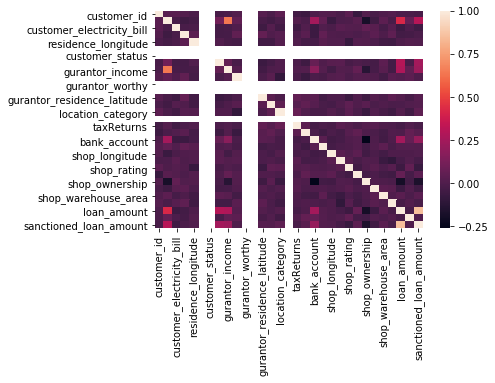

In [65]:
sns.heatmap(customerDf.corr())

In [32]:
X = customerDf.drop("sanctioned_loan_amount",axis=1)
y = customerDf["sanctioned_loan_amount"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(800, 30) (800,) (200, 30) (200,)


In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200)

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [50]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(X_test)

mean_squared_error(y_test,prediction)**0.5

14599.807955015911

In [51]:
prediction

array([49046.3755625 , 48403.7870625 , 75015.626625  , 61243.55103125,
        8728.54815625, 36340.53365625, 29976.57078125, 56343.82340625,
       15890.80584375, 27916.24640625, 55578.587125  , 77183.82915625,
       36287.787     , 25733.979375  , 23650.56596875,  8572.09409375,
       28870.78871875, 88650.58353125, 40357.46875   , 15608.3554375 ,
        5315.2968125 , 49076.51328125, 21922.15578125, 13988.62725   ,
       12846.8289375 , 69995.1799375 , 27885.93734375, 41019.41746875,
        9122.6225625 , 74854.49675   , 53452.157625  , 25061.72028125,
       36642.1145    , 39028.492875  , 49074.20878125, 25582.98996875,
       51989.077375  , 25005.28184375, 16651.08734375, 15258.916625  ,
       29759.6765    , 49881.92053125, 34265.7096875 ,  8107.655     ,
       19782.670875  , 22710.14546875, 79816.10309375, 33866.4161875 ,
        3759.139875  , 42281.1234375 , 49230.7480625 , 44081.7411875 ,
        3776.6240625 , 13505.97875   , 31076.36490625, 35287.63965625,
      

In [46]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))

In [52]:
result = pd.DataFrame()
pd.set_option('display.float_format', '{:.2f}'.format)
result['actual_loan_amount'] = X_test['loan_amount']
result['predicted_loan_amount'] = prediction
result = result.sort_index(axis = 0) 
result

,actual_loan_amount,predicted_loan_amount
2,39000.00,34466.33
13,87500.00,80191.47
14,64937.50,75422.96
25,15000.00,15608.36
35,13437.50,14030.16
...,...,...
976,15500.00,15660.10
978,14000.00,15277.52
988,56000.00,49345.72
994,87500.00,81615.35


In [45]:
model = pickle.load(open("./model.sav", 'rb'))

In [53]:
prediction = model.predict(X_test)

mean_squared_error(y_test,prediction)**0.5

14599.807955015911

In [61]:
result = pd.DataFrame()
pd.set_option('display.float_format', '{:.2f}'.format)
result['actual_loan_amount'] = X_test['loan_amount']
result['predicted_loan_amount'] = prediction
result['score'] =  (prediction/X_test['loan_amount']) / (1+2.71**(-prediction/X_test['loan_amount']))
result = result.sort_index(axis = 0) 
result

,actual_loan_amount,predicted_loan_amount,score
2,39000.00,34466.33,0.62
13,87500.00,80191.47,0.65
14,64937.50,75422.96,0.88
25,15000.00,15608.36,0.77
35,13437.50,14030.16,0.77
...,...,...,...
976,15500.00,15660.10,0.74
978,14000.00,15277.52,0.82
988,56000.00,49345.72,0.62
994,87500.00,81615.35,0.67


In [62]:
result['score'].describe()

count   200.00
mean      0.74
std       0.11
min       0.51
25%       0.67
50%       0.74
75%       0.79
max       1.50
Name: score, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

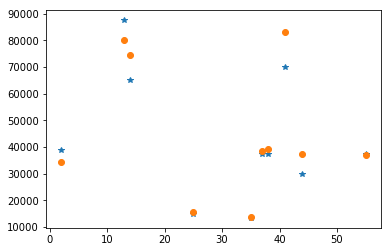

In [40]:
plt.plot(result['actual_loan_amount'][:10], '*')
plt.plot(result['predicted_loan_amount'][:10], 'o')

plt.show()